In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1_IMET_5_BA
data = pd.read_csv(r'C:\Users\mathe\Desktop\MATHEUS\UFBA\8º Semestre\Geofísica do Petróleo\Atividade_Joelson\dataset.csv')
data.head()

,Unnamed: 0,DEPTH,DT,FORM,GR,NOME_PERFIL,RHOB,RILD,SN,FORM_N,SN_F
0,0,3.496,-999.25,Pojuca,127.5043,1_IMET_5_BA,-999.25,-999.25,-999.25,1,-999.25
1,1,3.648,-999.25,Pojuca,88.4217,1_IMET_5_BA,-999.25,-999.25,-999.25,1,-999.25
2,2,3.800,-999.25,Pojuca,49.3390,1_IMET_5_BA,-999.25,-999.25,-999.25,1,-999.25
3,3,3.952,-999.25,Pojuca,10.2564,1_IMET_5_BA,-999.25,-999.25,-999.25,1,-999.25
4,4,4.104,-999.25,Pojuca,6.8270,1_IMET_5_BA,-999.25,-999.25,-999.25,1,-999.25


In [3]:
data.NOME_PERFIL.unique()

array(['1_IMET_5_BA', '1_RF_1_BA', '1_RF_3_BA', '1_RF_4_BA', '1_RF_5_BA',
       '1_SUS_0001_BA', '1_VP_0001_BA', '2_MST_0001_BA', '3MGN_0002',
       '3MGP_0019_BA', '3MGP_0020_BA', '3MGP_0021_BA', '3MGP_0026_BA',
       '3MGP_0035D', '4BB_10_BA', '4MG_0008_BA', '6MGP_0001_BA'],
      dtype=object)

In [4]:
data = data[data.RILD>0]

In [5]:
well_6mgp = data.loc[data.NOME_PERFIL == '6MGP_0001_BA'][['DEPTH', 'RILD', 'FORM', 'FORM_N', 'NOME_PERFIL']]

In [6]:
well_6mgp.reset_index(drop = True, inplace=True)

In [7]:
well_6mgp

,DEPTH,RILD,FORM,FORM_N,NOME_PERFIL
0,57.1500,23.9059,São Sebastião,0,6MGP_0001_BA
1,57.3024,24.7020,São Sebastião,0,6MGP_0001_BA
2,57.4548,25.1406,São Sebastião,0,6MGP_0001_BA
3,57.6070,24.6415,São Sebastião,0,6MGP_0001_BA
4,57.7596,23.6890,São Sebastião,0,6MGP_0001_BA
...,...,...,...,...,...
27374,4229.4048,43.3739,Sergi,7,6MGP_0001_BA
27375,4229.5570,43.2519,Sergi,7,6MGP_0001_BA
27376,4229.7096,43.1290,Sergi,7,6MGP_0001_BA
27377,4229.8600,43.0064,Sergi,7,6MGP_0001_BA


In [8]:
well_6mgp.FORM.unique()

array(['São Sebastião', 'Pojuca', 'Marfim', 'Maracangalha', 'Candeias',
       'Água Grande', 'Sergi'], dtype=object)

In [9]:
well_6mgp['RILD_log10'] = np.log(well_6mgp.RILD)
well_6mgp.head()

,DEPTH,RILD,FORM,FORM_N,NOME_PERFIL,RILD_log10
0,57.1500,23.9059,São Sebastião,0,6MGP_0001_BA,3.174125
1,57.3024,24.7020,São Sebastião,0,6MGP_0001_BA,3.206884
2,57.4548,25.1406,São Sebastião,0,6MGP_0001_BA,3.224484
3,57.6070,24.6415,São Sebastião,0,6MGP_0001_BA,3.204432
4,57.7596,23.6890,São Sebastião,0,6MGP_0001_BA,3.165011


In [10]:
well_6mgp.drop(labels=[4625,27122], axis=0, inplace=True)

In [11]:
well_6mgp = well_6mgp.loc[well_6mgp.DEPTH > 57]

In [12]:
well_6mgp.reset_index(drop = True, inplace=True)

In [13]:
res_mean = []
for j in range(len(well_6mgp)):
    if well_6mgp.FORM[j] == 'São Sebastião':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'São Sebastião'].RILD.mean())
    if well_6mgp.FORM[j] == 'Pojuca':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'Pojuca'].RILD.mean())
    if well_6mgp.FORM[j] == 'Marfim':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'Marfim'].RILD.mean())
    if well_6mgp.FORM[j] == 'Maracangalha':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'Maracangalha'].RILD.mean())
    if well_6mgp.FORM[j] == 'Candeias':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'Candeias'].RILD.mean())
    if well_6mgp.FORM[j] == 'Água Grande':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'Água Grande'].RILD.mean())
    if well_6mgp.FORM[j] == 'Sergi':
        res_mean.append(well_6mgp.loc[well_6mgp.FORM == 'Sergi'].RILD.mean())

In [14]:
len(res_mean)

27376

In [24]:
res_mean

[22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,
 22.32139775784754,


In [15]:
len( well_6mgp.DEPTH)

27376

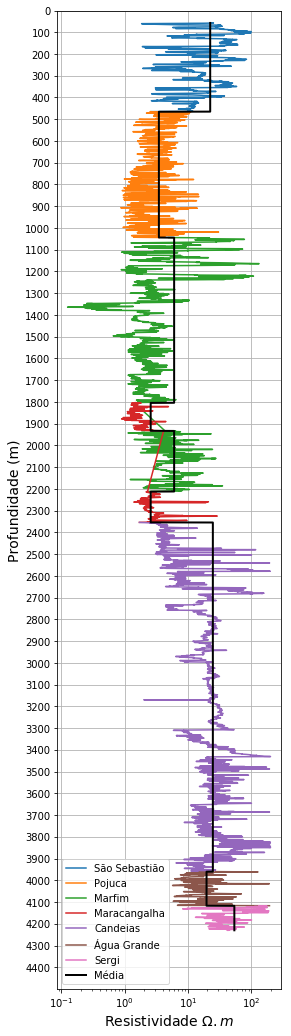

In [16]:
formacao = list(well_6mgp.FORM.unique())

plt.figure(figsize=(4,18))

for i in range(len(formacao)):
    plt.plot(well_6mgp.loc[well_6mgp.FORM == formacao[i]].RILD, well_6mgp.loc[well_6mgp.FORM == formacao[i]].DEPTH, 
             label=formacao[i])
    
plt.plot(res_mean, well_6mgp.DEPTH, lw=2, c='black', label='Média')
    
    
plt.xscale('log')    
plt.ylim(4500,0)
plt.yticks(np.arange(0,4500,100))
plt.xlabel('Resistividade $\Omega . m$', fontsize=14)
plt.ylabel('Profundidade (m)', fontsize=14)
plt.legend()
plt.grid()
plt.savefig('log', dpi=300)
plt.show()

In [17]:
well_6mgp.FORM.unique()

array(['São Sebastião', 'Pojuca', 'Marfim', 'Maracangalha', 'Candeias',
       'Água Grande', 'Sergi'], dtype=object)

In [18]:
well_6mgp.head()

,DEPTH,RILD,FORM,FORM_N,NOME_PERFIL,RILD_log10
0,57.1500,23.9059,São Sebastião,0,6MGP_0001_BA,3.174125
1,57.3024,24.7020,São Sebastião,0,6MGP_0001_BA,3.206884
2,57.4548,25.1406,São Sebastião,0,6MGP_0001_BA,3.224484
3,57.6070,24.6415,São Sebastião,0,6MGP_0001_BA,3.204432
4,57.7596,23.6890,São Sebastião,0,6MGP_0001_BA,3.165011


In [19]:
espessuras = []
for i in range(len(formacao)):
    print('Espessura da camada', i+1, max(well_6mgp.loc[well_6mgp.FORM == formacao[i]].DEPTH) - min(well_6mgp.loc[well_6mgp.FORM == formacao[i]].DEPTH), 'm')
    espessuras.append(max(well_6mgp.loc[well_6mgp.FORM == formacao[i]].DEPTH) - min(well_6mgp.loc[well_6mgp.FORM == formacao[i]].DEPTH))

Espessura da camada 1 407.8224 m
Espessura da camada 2 578.8152 m
Espessura da camada 3 1167.8411999999998 m
Espessura da camada 4 549.8604000000003 m
Espessura da camada 5 1605.8388 m
Espessura da camada 6 156.81960000000026 m
Espessura da camada 7 112.9284000000016 m


In [33]:
resistividades = []
for i in range(len(formacao)):
    print('Resistividade da Formação', f'{formacao[i]}', well_6mgp.loc[well_6mgp.FORM == formacao[i]].RILD.mean(), 'Ohm.m')
    resistividades.append(well_6mgp.loc[well_6mgp.FORM == formacao[i]].RILD.mean())

Resistividade da Formação São Sebastião 22.32139775784754 Ohm.m
Resistividade da Formação Pojuca 3.4556311380400424 Ohm.m
Resistividade da Formação Marfim 6.015672524570926 Ohm.m
Resistividade da Formação Maracangalha 2.5633314960629923 Ohm.m
Resistividade da Formação Candeias 24.587774767508066 Ohm.m
Resistividade da Formação Água Grande 19.545096310679615 Ohm.m
Resistividade da Formação Sergi 53.708199325236166 Ohm.m
